<a href="https://colab.research.google.com/github/RobertoFernandez1/EIE_401_MULTIMEDIA/blob/main/Proyecto_1_FernandezRoberto_RobertoFernandez1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Proyecto 1</h2></center>
<center><h3>Procesamiento digital de señales</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Roberto Fernandez Fuentes</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


In [ ]:
from IPython.display import IFrame, display
filepath = "Proyecto_1_EIE401.pdf"
IFrame(filepath, width=700, height=400)




Debes usar el sitio https://gwosc.org/eventapi/html/GWTC/, donde encuentras todo el catálogo de observaciones con los datos en diferentes formatos. Debes seleccionar una detección para tu estudio y descargar los datos correspondientes (H5 o TXT), lo que posteriormente deberás tratar de manera digital como audio (serie de tiempo).
tip: Te recomiendo tomar la serie de tiempo corta (32 segundos) para facilitar el análisis, y asegurarte de tomar la tasa de muestreo más alta.
tip: Asegúrate de tomar un caso cuyo espectrograma de muestra, indique una señal clara y fuerte para facilitar tu trabajo, de otra forma es posible que no logres aislarla lo suficiente.


## 1. Carga de Datos


In [ ]:
#Descomprimimos el archivo de manera de poder trabajar con los datos de este

import gzip
import shutil
ruta_archivo_comprimido="/content/H-H1_GWOSC_16KHZ_R1-1268903496-32 (1).txt.gz"
ruta_archivo_descomprimido="archivo_descomprimido.txt"
with gzip.open(ruta_archivo_comprimido,"rb") as archivo_comprimido :
  with open(ruta_archivo_descomprimido,"wb") as archivo_descomprimido:
    shutil.copyfileobj(archivo_comprimido,archivo_descomprimido)



In [ ]:
import numpy as np

ruta_archivo="archivo_descomprimido.txt"
strain=np.loadtxt(ruta_archivo,delimiter=",",skiprows=1,dtype=float)
strain
y=len(strain)
y

524288

(0.0, 15000.0)

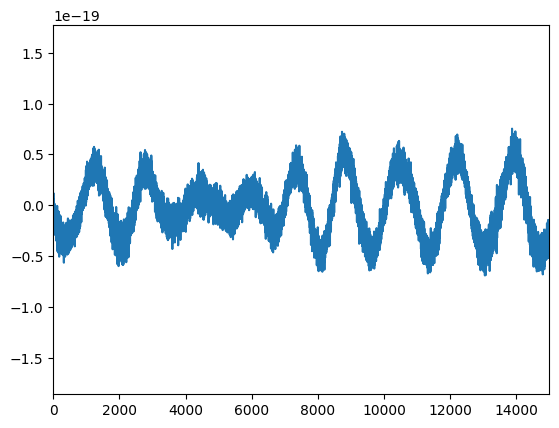

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
plt.plot(strain)
plt.xlim(0,15000)

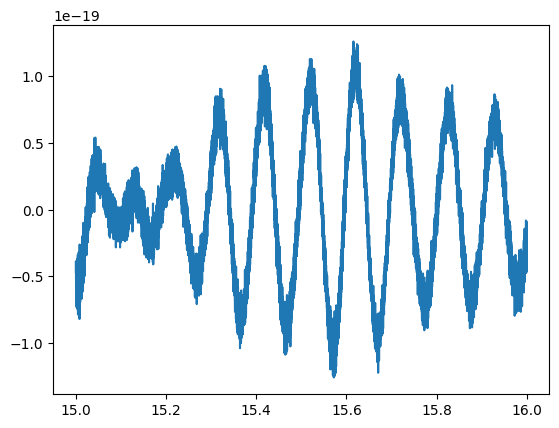

In [ ]:
#Recortamos nuestra señal para un mejor analisis
fs=16000
time=np.arange(strain.size)
max_time=strain.size/fs
lowtime=15
hightime=16
low_sample=int(lowtime*fs)
high_sample=int(hightime*fs)

time_steps=np.linspace(lowtime,hightime,strain[low_sample:high_sample].size)
plt.plot(time_steps,strain[low_sample:high_sample])

## 2. Convertir en audio
Es una forma de validar que tenemos un alto componente de ruido en la señal y que el interés es eliminarlo para encontrar una señal candidata.

Te recomiendo hacer una señal de audio de cada uno de las etapas para así validar como va el proceso. Al final deberás obtener un señal con CHIRP o BUMP. Son sonidos que comprueban que tienes una cantidad de potencia que sobre destaca sobre el ruido.

In [ ]:
#A travez de la libreria incluida IPython.display,seleccionamos la funcion audio para asi poder escuchar el audio del archivo seleccionado ,el cual deberia tener una duracion de 32 segundos

from IPython.display import Audio
Audio(strain,rate=16000)


In [ ]:
#Dividimos nuestra señal original en 4 partes iguales ,de manera de poder analizarlas de mejor forma ,en este caso ocupamos un ciclo for para poder hacer estas divisiones y tambien la funcion
# display.
rate=16000
div_strain = len(strain) // 4
etapas = [strain[i:i+div_strain] for i in range(0, len(strain), div_strain)]

for i, signal in enumerate(etapas):
    print(f"Reproduciendo señal de la etapa {i+1}")
    display(Audio(signal, rate=rate))


Reproduciendo señal de la etapa 1


Reproduciendo señal de la etapa 2


Reproduciendo señal de la etapa 3


Reproduciendo señal de la etapa 4


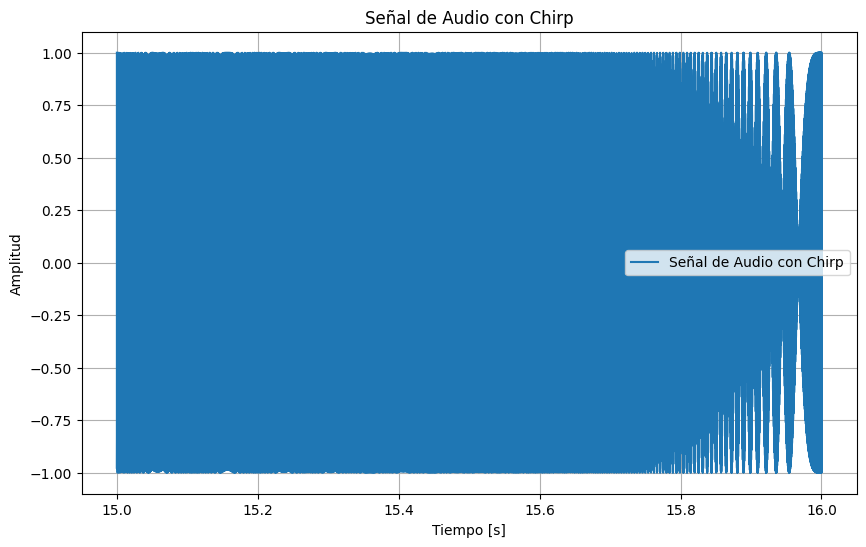

In [ ]:
#Mediante la liberia from scipy.signal import chirp hacemos de nuestra señal original ,tanto para audio como para grafica
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.signal import chirp


f0 = 0
f1 = 16000
duration = 32

chirp_signal = chirp(time_steps, f0=f0, f1=f1, t1=duration, method='linear')

audio_with_chirp = strain[low_sample:high_sample] + chirp_signal[:len(strain)]

# Graficar la señal de audio original y la señal con chirp
plt.figure(figsize=(10, 6))
plt.plot(time_steps, audio_with_chirp, label='Señal de Audio con Chirp')
plt.title('Señal de Audio con Chirp')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:


chirp_signal = chirp(strain, f0=f0, f1=f1, t1=duration, method='linear')
Audio(chirp_signal , rate=44100)



## 3. Análisis de Fourier
Al realizar la conversión, queremos ver cuales son las componentes de ruido que más afectan al instrumento y debemos ignorar en el análisis. Eso se ve como "pico" o la apariencia de "peine".
Se debe presenta la densidad espectral de potencia antes y después de la función de Windowing.


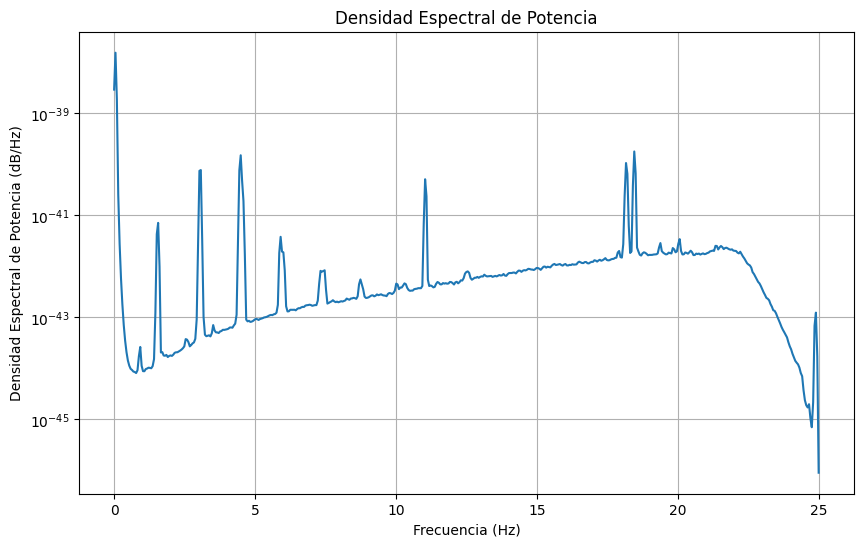

In [ ]:
#Mediante la librria de scipy.signal import welch podemos calcular la densidad espectral de potencia de nuestro archivo
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch


frequencies, psd = welch(strain, fs=50, nperseg=1024)

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.title('Densidad Espectral de Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia (dB/Hz)')
plt.grid(True)
plt.show()


<ipython-input-13-9915e4ae81f1>:8: DeprecationWarning: Importing tukey from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.tukey' or the convenience function 'scipy.signal.get_window' instead.
  frequencies, psd = welch(strain, fs=50, window=tukey(len(strain), alpha), nperseg=524288, noverlap=128)


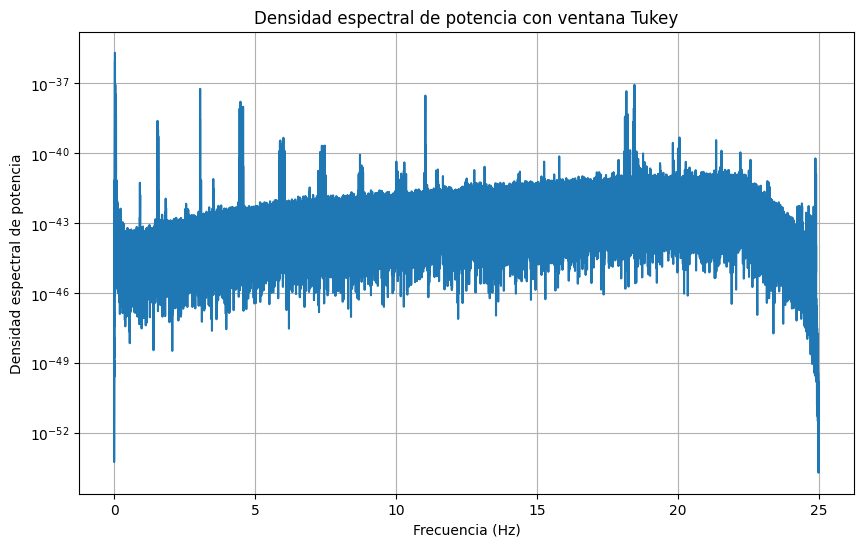

In [ ]:
#Por metodologia ,aplicamos la window tukey a nuestra señal original para un mejor analisis ,ocupamos la misma libreria ,pero le agreramos la funcion reservada tukey
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, tukey

alpha = 0.5  # Parámetro de forma de la ventana Tukey

frequencies, psd = welch(strain, fs=50, window=tukey(len(strain), alpha), nperseg=524288, noverlap=128)

plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia')
plt.title('Densidad espectral de potencia con ventana Tukey')
plt.grid(True)
plt.show()


## 4. Procesamiento
Debes inferir de tu estudio, cual es el proceso que aplican a la señal y reproducirlo. Es posible que cada estudiante llegue a una solución más o menos diferente, pues no hay un código abierto donde esté el procedimiento completo.


<ipython-input-14-2ec80868fa35>:37: RuntimeWarning: divide by zero encountered in divide
  whitening_matrix = np.dot(U, np.dot(np.diag(1.0 / np.sqrt(S)), U.T))


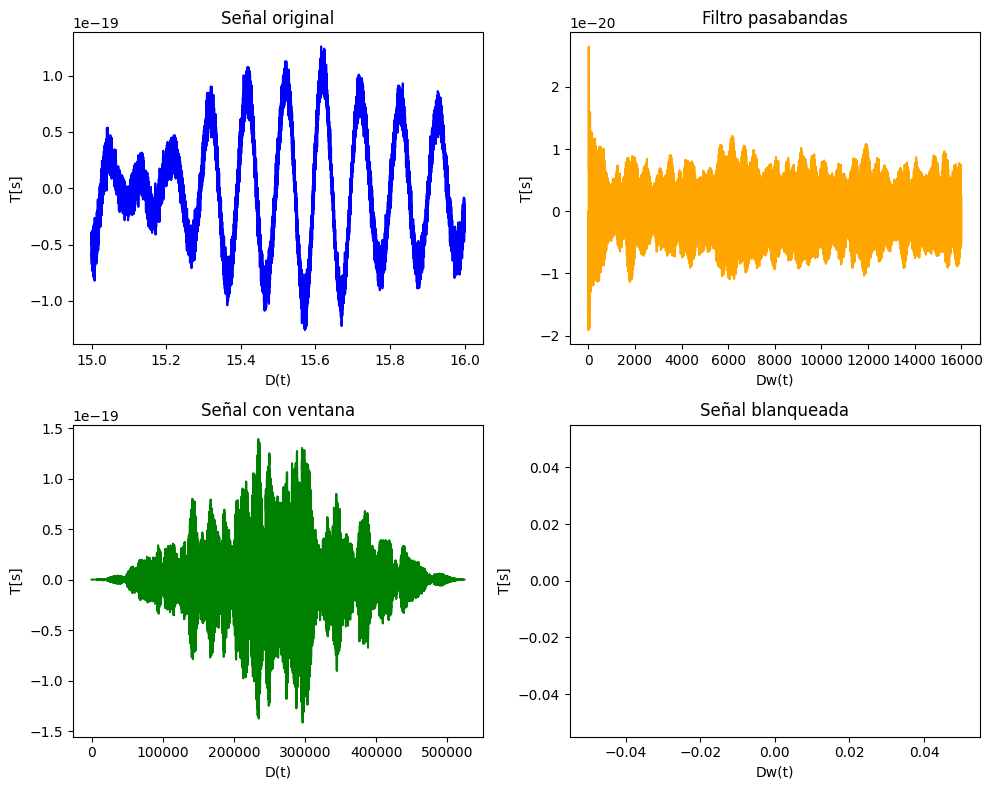

In [ ]:
#Con el fin de validar nuestro proceso ,vamos a calcular Windowed,Whitened,y con el filtro pasabandas,ocupamps la libreria scipy.signal ,con las funciones incorporadas butter,sosfilt
#Un detalle a analizar es que la señal blanqueada no arrojo un grafico ,problema el cual no pude solucionar ,de acuerdo a la bibliografia del trabajo ,esta deberia estar graficada para su posterior analisis de calidad.

import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import butter, sosfilt

#Señal Original
fs=16000
time=np.arange(strain.size)
max_time=strain.size/fs
lowtime=15
hightime=16
low_sample=int(lowtime*fs)
high_sample=int(hightime*fs)
time_steps=np.linspace(lowtime,hightime,strain[low_sample:high_sample].size)

#Señal windowed
window = np.hanning(len(strain))
windowed_signal = strain * window

#Filtro pasa banda
lowcut = 500   # Frecuencia de corte inferior
highcut = 3000  # Frecuencia de corte superior
order = 4
nyquist_freq = 0.5 * 32000
low = lowcut / nyquist_freq
high = highcut / nyquist_freq
sos = butter(order, [low, high], btype='band', output='sos')
filtered_signal = sosfilt(sos, strain[low_sample:high_sample])


covariance_matrix = np.cov(strain,time)
U, S, Vt = np.linalg.svd(covariance_matrix)

# Calcular la matriz de blanqueamiento
whitening_matrix = np.dot(U, np.dot(np.diag(1.0 / np.sqrt(S)), U.T))

y=len(strain)

# Aplicar la matriz de blanqueamiento a la señal original
whitened_signal = np.dot(whitening_matrix, y)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(time_steps, strain[low_sample:high_sample], color='blue')
axs[0, 0].set_title('Señal original')
axs[0, 0].set_xlabel('D(t)')
axs[0, 0].set_ylabel('T[s]')

axs[0, 1].plot(filtered_signal, color='orange')
axs[0, 1].set_title('Filtro pasabandas')
axs[0, 1].set_xlabel('Dw(t)')
axs[0, 1].set_ylabel('T[s]')

axs[1, 0].plot(windowed_signal, color='green')
axs[1, 0].set_title('Señal con ventana')
axs[1, 0].set_xlabel('D(t)')
axs[1, 0].set_ylabel('T[s]')

axs[1, 1].plot(whitened_signal, color='red')
axs[1, 1].set_title('Señal blanqueada')
axs[1, 1].set_xlabel('Dw(t)')
axs[1, 1].set_ylabel('T[s]')

plt.tight_layout()

plt.show()







# Resampling
Para lograr una mejor definición de la señal, se debe hacer un resampleo. Esto tienen consecuencias por eso debe elegirse bien la frecuencia de tal forma que no se introduzca ruido.

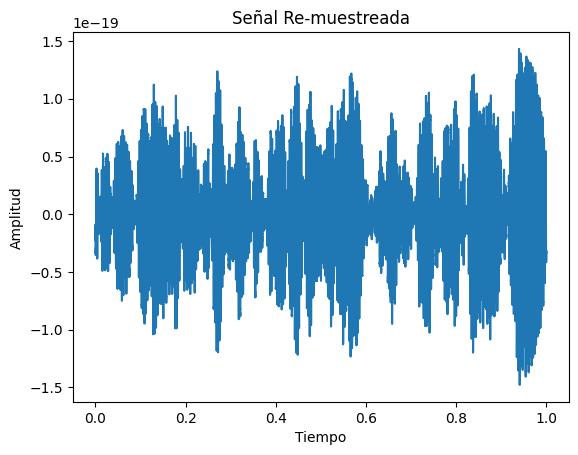

In [ ]:
#Ocupamos la funcion incorporada de la libreria scipy.signal llamada resample para poder hacer el resampleo de la señal ,la frecuencia seleccionada es 32000 [Hz]
from scipy.signal import resample
import numpy as np
import matplotlib.pyplot as plt
fs=32000
new_fs=200
x_resampled = resample(strain, int(len(strain) * (new_fs / fs)))

t_resampled = np.linspace(0, 1, len(x_resampled), endpoint=False)
plt.plot(t_resampled, x_resampled)
plt.title('Señal Re-muestreada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.show()



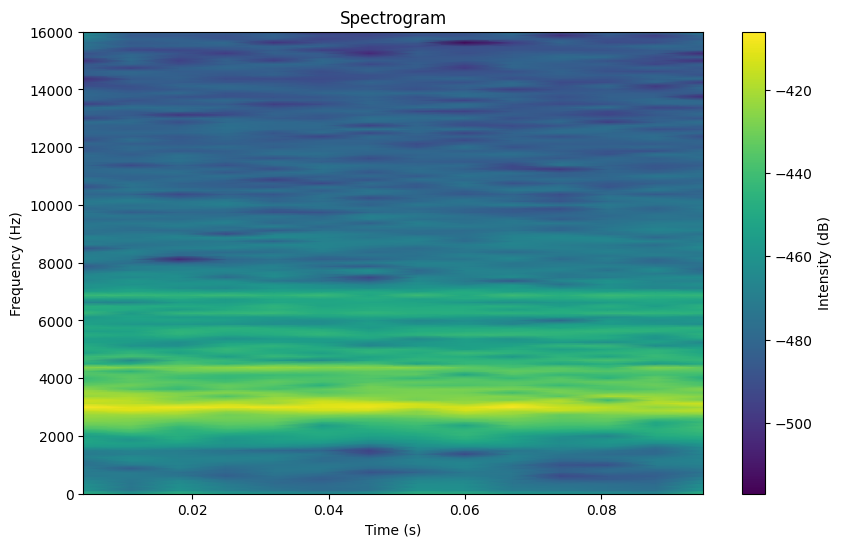

In [ ]:
#Con la funcion incorporada spectrogram de la libreria scipy.signal graficamos el espectrograma
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

fs = 32000  # Sampling frequency
t = np.linspace(0, 32, 5 * fs, endpoint=False)
frequencies = [30, 90, 200, 500]  # Frecuencias seleccionadas
frequencies, times, Sxx = spectrogram(x_resampled, fs)

plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Intensity (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.show()
